In [1]:
import pickle
import torch
import numpy as np
from helper_fns import taylor_softmax_v1
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
from tqdm.auto import tqdm

/opt/conda/envs/ingenious/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
gains_file="/home/hrenduchinta/LM-pretraining/subsets/fl_bert_23_12_2022_02:38:00/gains_after_step_81140.pkl"
with open(gains_file, "rb") as f:
    gains=pickle.load(f)

In [6]:
probs=[taylor_softmax_v1(torch.from_numpy(np.array([partition_gains]))).numpy()[0] for partition_gains in gains]

In [7]:
for g in gains[0]:
    print(g)

9167.677487388253
178.88775101304054
115.42814774811268
65.66421574354172
52.75643450021744
47.76381656527519
47.11283288896084
44.70275196433067
37.75055882334709
35.70353703200817
35.16768030822277
27.99880599975586
26.310896426439285
25.167924255132675
23.787575498223305
23.184150636196136
20.34204614162445
17.8820371478796
17.009843319654465
16.68904286623001
16.557539403438568
15.529932767152786
14.307731062173843
14.02161693572998
13.615019619464874
12.736890643835068
12.367765724658966
12.32007172703743
12.311017721891403
11.891381978988647
11.52574822306633
10.635608583688736
9.812700778245926
9.340027511119843
9.17739075422287
9.024254143238068
8.516140773892403
8.4594124853611
8.170892655849457
8.13270553946495
8.11880637705326
7.897868633270264
7.584762632846832
7.043614715337753
7.035636931657791
6.9275627583265305
6.874071896076202
6.8507460951805115
6.833312302827835
6.620605945587158
6.540481582283974
6.311296343803406
6.1454885601997375
6.139546483755112
6.0591605305671

In [8]:
for p in probs[0]:
    print(p)

0.9983107358510619
0.0003842987293413868
0.00016099054000630613
5.278804819097296e-05
3.4329186832475966e-05
2.8250771985619882e-05
2.7501841426035567e-05
2.481675073374718e-05
1.784421334112314e-05
1.6009967137898354e-05
1.554624582952253e-05
9.998358731044568e-06
8.869642547333906e-06
8.143754205427329e-06
7.308473908290464e-06
6.957543537443147e-06
5.420968561886096e-06
4.24586756805175e-06
3.86375075633018e-06
3.7277497934712675e-06
3.672706229766203e-06
3.2567247072935202e-06
2.7946242254133965e-06
2.691572630284743e-06
2.5484706098778944e-06
2.252810334649488e-06
2.13399578834568e-06
2.1188800469622917e-06
2.116016647007709e-06
1.9854398885187826e-06
1.8750764709029634e-06
1.6196700544515604e-06
1.4002950392508501e-06
1.2815597608277463e-06
1.2419325266863863e-06
1.2051943069071856e-06
1.087285484429477e-06
1.0745020816783686e-06
1.0106686814858438e-06
1.0023681541963365e-06
9.993555656582238e-07
9.520843356609803e-07
8.87078771492262e-07
7.802180243533195e-07
7.786946717760021e-

In [16]:
probs=[taylor_softmax_v1(torch.from_numpy(np.array([partition_gains]))).numpy()[0] for partition_gains in gains]

In [22]:
for p in probs[2]:
    print(p)

0.0008199775460319882
0.00032835587938518675
0.0003241484414055142
0.0003096712136360469
0.0002589378957764789
0.00023208447341340407
0.0002117345660579819
0.00021060342468227653
0.00020985149205061978
0.00020401083309693177
0.00019296089096053514
0.00019259641104951963
0.00018648777293843742
0.00018632883334139663
0.00018490147850198555
0.0001838681884432344
0.00018170966663321554
0.00018027765895170915
0.0001781035315751741
0.00017675512694166165
0.00017630629027730232
0.00017490390945911383
0.0001714588752017652
0.00017070882153509982
0.00017012290536299368
0.0001700216552300543
0.00016938434379953205
0.0001679820705613327
0.00016792231693173808
0.0001675195030593993
0.00016750065711027145
0.00016721761186788955
0.00016662219086229752
0.00016611843378695412
0.00016605281957895679
0.00016600403938418862
0.00016568041242814825
0.00016549821670314388
0.00016476999811189467
0.0001642795855641901
0.00016227914687941774
0.00016197130601562
0.00016155297796143455
0.0001610661832085393
0.00

In [18]:
with open("gains.txt", "w") as f:
    for g in gains[0]:
        f.write(f"{g}\n")

In [19]:
with open("probs.txt", "w") as f:
    for p in probs[0]:
        f.write(f"{p}\n")

In [25]:
P=np.array(probs[0])
N=np.size(P)
ones=np.ones(N)
with open("jensenshannon.txt", "w") as f:
    for i in range(N):
        f.write(f"{jensenshannon(P[i:], (ones[i:]*(1/N-i)))}\n")

In [23]:
x=np.array(range(len(probs[0])))
y=np.array(probs[0])

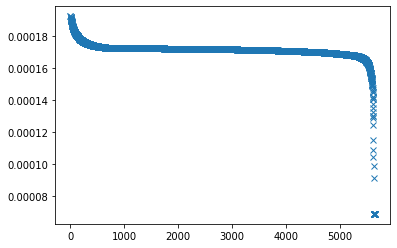

In [26]:
plt.plot(y[100:], "x")
# plt.ylim((0.75*1e-8, 0.80*1e-8))

In [23]:
for prob in probs[0]:
    print(prob)

0.9986144941554795
0.0005958611362238596
0.0003925076447699544
5.016555381356781e-05
3.26838979034551e-05
1.9961356926282855e-05
1.5117545140185105e-05
1.1319733717502277e-05
1.047540930998349e-05
7.493435112702384e-06
5.045783649213177e-06
4.778978113383299e-06
3.773869660569606e-06
3.592251728828398e-06
3.5213117101565634e-06
3.0860935137204444e-06
2.893064684786814e-06
2.6969286901562175e-06
2.3077616037933314e-06
2.0505846550129997e-06
1.4406160521993287e-06
1.368511327872643e-06
1.2611583220551256e-06
1.257013503709375e-06
1.1947676592443022e-06
1.1781702923948101e-06
9.82805822395728e-07
9.614804155157385e-07
9.128398935250338e-07
8.622876338140978e-07
6.879163043286012e-07
6.457822163334857e-07
5.804266807769959e-07
5.348387434292051e-07
5.309763848708733e-07
4.264662957530784e-07
4.187849345555998e-07
3.960632009286416e-07
3.6292187138771105e-07
3.611266998612759e-07
3.4905983198187096e-07
3.286323047598488e-07
3.227248424188644e-07
2.678741931547828e-07
2.6482651371353936e-07


In [1]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel

In [2]:
X=np.load("/home/hrenduchinta/text-analysis/wikitext_representations_layer_9.npy")

In [3]:
Y=X[np.random.randint(0, np.shape(X)[0], 100000)]

In [4]:
Y.shape

(100000, 768)

In [16]:
sijs=rbf_kernel(Y, gamma=0.01)

In [17]:
l=sijs[23].tolist()
for i in sorted(l, reverse=True):
    print(i)

1.0
0.7479672431945801
0.7470422387123108
0.7399393320083618
0.7329855561256409
0.7305799722671509
0.7298452854156494
0.7296096086502075
0.7281587719917297
0.7273266911506653
0.7260332703590393
0.7259520292282104
0.7250848412513733
0.723834753036499
0.7230557799339294
0.7218168377876282
0.7206583619117737
0.71988844871521
0.7189964056015015
0.7186231017112732
0.7154356241226196
0.7153098583221436
0.7152262330055237
0.7147589325904846
0.7141387462615967
0.7141218781471252
0.7140072584152222
0.7122654318809509
0.7109876275062561
0.7109130620956421
0.710250973701477
0.7099960446357727
0.7089903354644775
0.7084617018699646
0.7072848081588745
0.7070850133895874
0.7067537307739258
0.7062610387802124
0.7054826021194458
0.7053561806678772
0.7052090764045715
0.7052090764045715
0.7050825357437134
0.7050291299819946
0.7049077749252319
0.7046657800674438
0.7045914530754089
0.7045648694038391
0.7044676542282104
0.7041769623756409
0.7036033272743225
0.7034822106361389
0.7034004330635071
0.7033579349